## 1. Open sift files

In [30]:
import numpy as np

def load_sift_binary(file_path):
    try:
        with open(file_path, 'rb') as f:
            # Skip the header (16 bytes)
            f.seek(16)

            # Read the number of keypoints
            num_keypoints = np.fromfile(f, dtype=np.int32, count=1)[0]
            print(f"Number of keypoints: {num_keypoints}")

            # Skip extra bytes after the keypoint count (the next 64 bytes)
            extra_data_size = 64
            f.seek(extra_data_size, 1)  # Skip the extra data after the keypoint count
            
            # Read keypoints (x, y, scale, orientation)
            keypoints = np.fromfile(f, dtype=np.float32, count=num_keypoints * 4).reshape(-1, 4)

            # Read descriptors (128-dimensional vector for each keypoint)
            descriptors = np.fromfile(f, dtype=np.float32, count=num_keypoints * 128).reshape(-1, 128)

            return keypoints, descriptors
    except ValueError as e:
        print(f"Error processing the binary file: {e}")
        return None, None

# Path to the binary .sift file
file_path = 'frame_0474.sift'

# Load the data
keypoints, descriptors = load_sift_binary(file_path)

if keypoints is not None and descriptors is not None:
    print(f"Loaded {len(keypoints)} keypoints and {len(descriptors)} descriptors for {file_path[:-5]}")
    print("5 sample Keypoints: [x, y, scale, orientation] \n", keypoints[:7])  # Print the first 5 keypoints
    # print("Sample Descriptors:\n", descriptors[:1])  # Print the first 5 descriptors


Number of keypoints: 128
Loaded 128 keypoints and 128 descriptors for frame_0474
5 sample Keypoints: [x, y, scale, orientation] 
 [[ 2.4417941e+02  6.2660532e-39  2.1272322e+01 -1.3195118e+00]
 [ 4.1607755e+02  3.0472623e+02  1.3649650e-38  1.8579990e+01]
 [-5.1493579e-01  1.7564186e+02  2.5367709e+02  4.7941952e-39]
 [ 1.6510063e+01 -1.7114724e+00  4.4890564e+02  4.2687252e+01]
 [ 1.0330589e-38  1.3416776e+01 -3.0491228e+00  6.0867810e+02]
 [ 3.3565414e+02  3.2308113e-39  1.3363811e+01 -3.1595538e+00]
 [ 6.0867810e+02  3.3565414e+02  3.2308113e-39  1.3363811e+01]]


## 2. Cut images

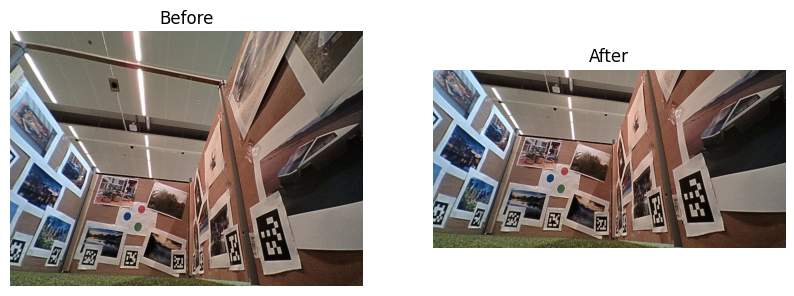

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

def crop_image(path):
    # Open the image
    img = Image.open(path)
    
    # Get image dimensions
    width, height = img.size
    
    # Define the cropping box (cutting 20% from the top and bottom)
    crop_box = (0, int(height * 0.3), width, int(height * 1))
    
    # Crop the image
    cropped_img = img.crop(crop_box)
    
    # Show before and after images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Before")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img)
    plt.title("After")
    plt.axis('off')
    
    plt.show()

crop_image("frame_20241205_122130396.jpg")